In [23]:
from fbprophet import Prophet
import pandas as pd

In [2]:
model = Prophet(changepoint_prior_scale=0.01)

In [4]:
df = pd.read_csv('model_ready_ts.csv')

In [5]:
df.head()

,Unnamed: 0,Haryana Load (MW),month,weekday,temp,dew,humidity,windspeed,winddir,visibility,cloudcover,year,day,Date
0,0,7224.17,10,5,30.0,24.0,70.29,0.0,0.0,2.0,27.4,2016,1,2016-10-01 00:15:00
1,1,7141.92,10,5,30.0,24.0,70.29,0.0,0.0,2.0,27.4,2016,1,2016-10-01 00:30:00
2,2,7121.93,10,5,30.0,24.0,70.29,0.0,0.0,2.0,27.4,2016,1,2016-10-01 00:45:00
3,3,7066.64,10,5,30.0,24.0,70.29,0.0,0.0,2.0,0.0,2016,1,2016-10-01 01:00:00
4,4,6937.04,10,5,30.0,24.0,70.29,0.0,0.0,2.0,0.0,2016,1,2016-10-01 01:15:00


In [6]:
df.drop(columns= 'Unnamed: 0')

,Haryana Load (MW),month,weekday,temp,dew,humidity,windspeed,winddir,visibility,cloudcover,year,day,Date
0,7224.17,10,5,30.0,24.0,70.29,0.0,0.0,2.0,27.4,2016,1,2016-10-01 00:15:00
1,7141.92,10,5,30.0,24.0,70.29,0.0,0.0,2.0,27.4,2016,1,2016-10-01 00:30:00
2,7121.93,10,5,30.0,24.0,70.29,0.0,0.0,2.0,27.4,2016,1,2016-10-01 00:45:00
3,7066.64,10,5,30.0,24.0,70.29,0.0,0.0,2.0,0.0,2016,1,2016-10-01 01:00:00
4,6937.04,10,5,30.0,24.0,70.29,0.0,0.0,2.0,0.0,2016,1,2016-10-01 01:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224632,8537.11,9,3,29.0,26.8,87.64,7.8,82.0,2.6,70.3,2021,9,2021-09-09 23:00:00
224633,8554.19,9,3,29.0,26.8,87.64,7.8,82.0,2.6,70.3,2021,9,2021-09-09 23:15:00
224634,8536.29,9,3,29.0,26.8,87.64,7.8,82.0,2.6,70.3,2021,9,2021-09-09 23:30:00
224635,8510.32,9,3,29.0,26.8,87.64,7.8,82.0,2.6,70.3,2021,9,2021-09-09 23:45:00


## Univariate Forecasting

In [7]:
dfuv = df[['Date', 'Haryana Load (MW)']]

In [8]:
dfuv

,Date,Haryana Load (MW)
0,2016-10-01 00:15:00,7224.17
1,2016-10-01 00:30:00,7141.92
2,2016-10-01 00:45:00,7121.93
3,2016-10-01 01:00:00,7066.64
4,2016-10-01 01:15:00,6937.04
...,...,...
224632,2021-09-09 23:00:00,8537.11
224633,2021-09-09 23:15:00,8554.19
224634,2021-09-09 23:30:00,8536.29
224635,2021-09-09 23:45:00,8510.32


In [9]:
dfuv = dfuv.rename(columns = {'Date':'ds', 'Haryana Load (MW)':'y'})
dfuv

,ds,y
0,2016-10-01 00:15:00,7224.17
1,2016-10-01 00:30:00,7141.92
2,2016-10-01 00:45:00,7121.93
3,2016-10-01 01:00:00,7066.64
4,2016-10-01 01:15:00,6937.04
...,...,...
224632,2021-09-09 23:00:00,8537.11
224633,2021-09-09 23:15:00,8554.19
224634,2021-09-09 23:30:00,8536.29
224635,2021-09-09 23:45:00,8510.32


In [10]:
dfuv.head()

,ds,y
0,2016-10-01 00:15:00,7224.17
1,2016-10-01 00:30:00,7141.92
2,2016-10-01 00:45:00,7121.93
3,2016-10-01 01:00:00,7066.64
4,2016-10-01 01:15:00,6937.04


## Done till here. Now, divide the data into train-test. Then, do univariate forecasting. Afterwards do multivariate forecasting with the complete dataset.

In [11]:
dfuv.tail()

,ds,y
224632,2021-09-09 23:00:00,8537.11
224633,2021-09-09 23:15:00,8554.19
224634,2021-09-09 23:30:00,8536.29
224635,2021-09-09 23:45:00,8510.32
224636,2021-09-09 00:00:00,8430.02


In [17]:
train_size = int(dfuv.shape[0]*0.7)

In [18]:
df_train = dfuv.iloc[:train_size]

In [20]:
# test_size = dfuv.shape[0] - train_size

In [21]:
df_test = dfuv[train_size:]

In [22]:
# model.fit(df_train)

In [24]:
import pickle

In [27]:
import joblib

In [28]:
joblib.dump(model, 'saved_uv_model.pkl')

['saved_uv_model.pkl']

In [30]:
saved_uv_model = joblib.load('saved_uv_model.pkl')

In [38]:
test_ds = pd.DataFrame(df_test['ds'])

In [39]:
test_ds

,ds
157245,2019-08-20 22:45:00
157246,2019-08-20 23:00:00
157247,2019-08-20 23:15:00
157248,2019-08-20 23:30:00
157249,2019-08-20 23:45:00
...,...
224632,2021-09-09 23:00:00
224633,2021-09-09 23:15:00
224634,2021-09-09 23:30:00
224635,2021-09-09 23:45:00


In [40]:
forecast = saved_uv_model.predict(test_ds)

In [42]:
test_forecast = forecast

In [45]:
test_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-08-03 00:00:00,6076.078360,6777.636767,9272.296638,6076.078360,6076.078360,1898.514269,1898.514269,1898.514269,-64.484923,...,105.038283,105.038283,105.038283,1857.960909,1857.960909,1857.960909,0.0,0.0,0.0,7974.592629
1,2019-08-03 00:15:00,6076.077249,6661.996452,9084.619448,6076.077249,6076.077249,1849.693805,1849.693805,1849.693805,-113.320589,...,105.175974,105.175974,105.175974,1857.838420,1857.838420,1857.838420,0.0,0.0,0.0,7925.771055
2,2019-08-03 00:30:00,6076.076139,6625.281184,9129.320321,6076.076139,6076.076139,1806.897266,1806.897266,1806.897266,-156.104443,...,105.285680,105.285680,105.285680,1857.716029,1857.716029,1857.716029,0.0,0.0,0.0,7882.973405
3,2019-08-03 00:45:00,6076.075029,6567.822837,9158.907957,6076.075029,6076.075029,1770.211168,1770.211168,1770.211168,-192.749038,...,105.366471,105.366471,105.366471,1857.593735,1857.593735,1857.593735,0.0,0.0,0.0,7846.286197
4,2019-08-03 02:00:00,6076.069479,6471.140319,9088.136505,6076.069479,6076.069479,1675.875508,1675.875508,1675.875508,-286.412790,...,105.304575,105.304575,105.304575,1856.983723,1856.983723,1856.983723,0.0,0.0,0.0,7751.944987


In [46]:
test_forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
67387,2021-12-31 22:45:00,5982.091318,-3896.611699,13523.819171,-3237.455254,13857.458350,-620.460033,-620.460033,-620.460033,254.877259,...,103.962738,103.962738,103.962738,-979.300030,-979.300030,-979.300030,0.0,0.0,0.0,5361.631285
67388,2021-12-31 23:00:00,5982.090208,-3995.412745,13434.733629,-3237.720803,13857.599419,-691.429457,-691.429457,-691.429457,183.614230,...,104.226333,104.226333,104.226333,-979.270020,-979.270020,-979.270020,0.0,0.0,0.0,5290.660751
67389,2021-12-31 23:15:00,5982.089098,-4322.538787,13198.744086,-3237.986353,13857.740488,-759.775555,-759.775555,-759.775555,114.998145,...,104.466624,104.466624,104.466624,-979.240324,-979.240324,-979.240324,0.0,0.0,0.0,5222.313543
67390,2021-12-31 23:30:00,5982.087988,-4268.360079,13381.104969,-3238.251902,13857.881557,-824.315507,-824.315507,-824.315507,50.212765,...,104.682671,104.682671,104.682671,-979.210943,-979.210943,-979.210943,0.0,0.0,0.0,5157.772480
67391,2021-12-31 23:45:00,5982.086878,-4003.087905,13019.152251,-3238.517451,13858.022625,-884.140665,-884.140665,-884.140665,-9.832324,...,104.873537,104.873537,104.873537,-979.181878,-979.181878,-979.181878,0.0,0.0,0.0,5097.946213


In [47]:
test_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2019-08-03 00:00:00,7974.592629,6777.636767,9272.296638
1,2019-08-03 00:15:00,7925.771055,6661.996452,9084.619448
2,2019-08-03 00:30:00,7882.973405,6625.281184,9129.320321
3,2019-08-03 00:45:00,7846.286197,6567.822837,9158.907957
4,2019-08-03 02:00:00,7751.944987,6471.140319,9088.136505
...,...,...,...,...
67387,2021-12-31 22:45:00,5361.631285,-3896.611699,13523.819171
67388,2021-12-31 23:00:00,5290.660751,-3995.412745,13434.733629
67389,2021-12-31 23:15:00,5222.313543,-4322.538787,13198.744086
67390,2021-12-31 23:30:00,5157.772480,-4268.360079,13381.104969


## Done till here. Plot test forecast with actual values

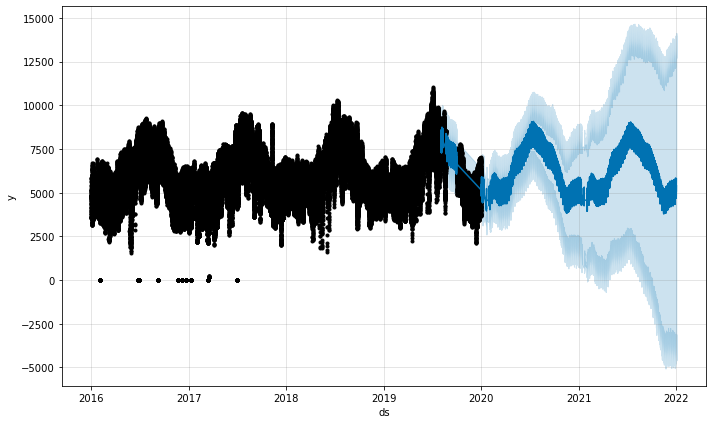

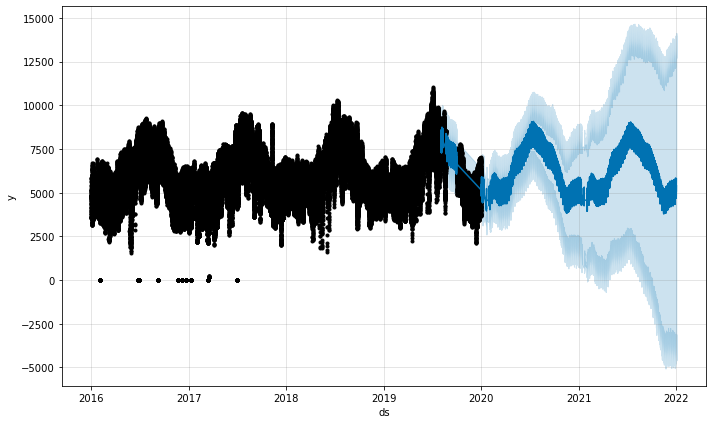

In [57]:
saved_uv_model.plot(test_forecast)

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

(0.0, 12000.0)

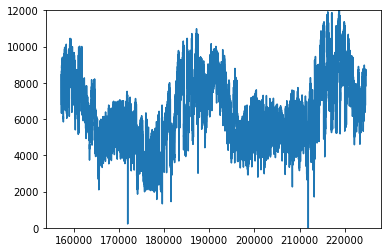

In [74]:
plt.plot(df_test['y'])
plt.ylim([0, 12000])

In [81]:
future = saved_uv_model.make_future_dataframe(periods=5*96, freq='H')

In [82]:
future.head()

,ds
0,2016-01-01 00:00:00
1,2016-01-01 00:15:00
2,2016-01-01 00:30:00
3,2016-01-01 00:45:00
4,2016-01-01 01:00:00


In [83]:
forecast = saved_uv_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
125127,2020-01-20 19:45:00,5168.358648,3906.323883,6440.308726
125128,2020-01-20 20:45:00,5230.380541,3934.427247,6510.629423
125129,2020-01-20 21:45:00,5074.069517,3805.009945,6324.714222
125130,2020-01-20 22:45:00,4810.340248,3652.934218,6005.271192
125131,2020-01-20 23:45:00,4560.129886,3348.612785,5840.876015


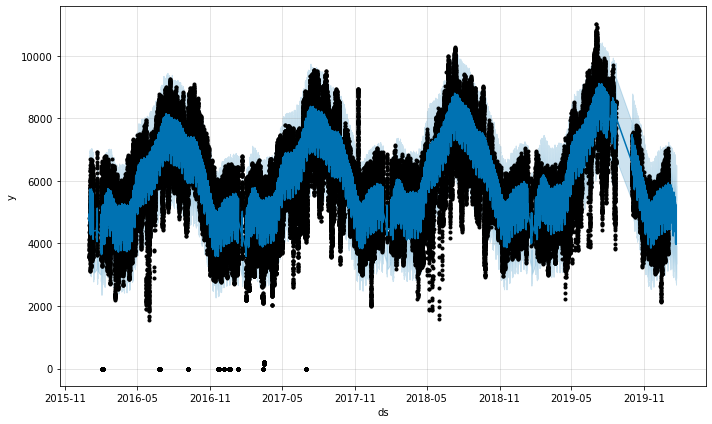

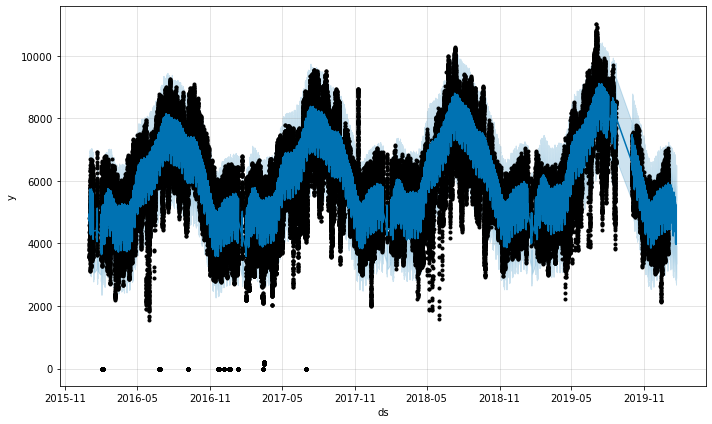

In [84]:
model.plot(forecast)